In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# shape
x_train.shape

(60000, 28, 28)

In [ ]:
# model
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28,)),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8715 - loss: 0.4541 - val_accuracy: 0.9663 - val_loss: 0.1247
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9615 - loss: 0.1318 - val_accuracy: 0.9738 - val_loss: 0.0917
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9748 - loss: 0.0838 - val_accuracy: 0.9752 - val_loss: 0.0791
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9814 - loss: 0.0606 - val_accuracy: 0.9780 - val_loss: 0.0808
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0459 - val_accuracy: 0.9768 - val_loss: 0.0795


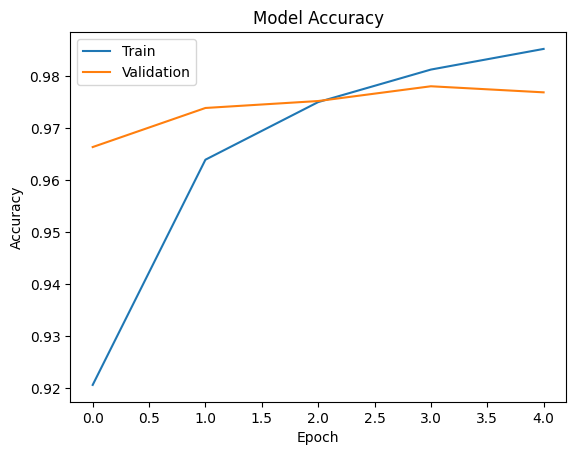

In [ ]:
# Model Accuracy plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


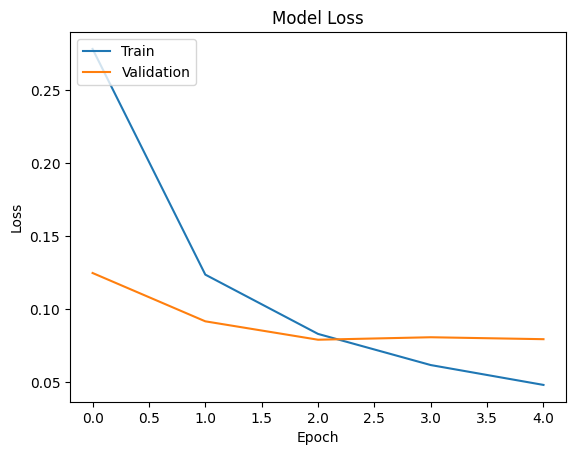

In [ ]:
# Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
Y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
import numpy as np
Y_pred1 = np.argmax(Y_pred, axis = 1)
Y_pred1

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
import pandas as pd

pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred1})

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


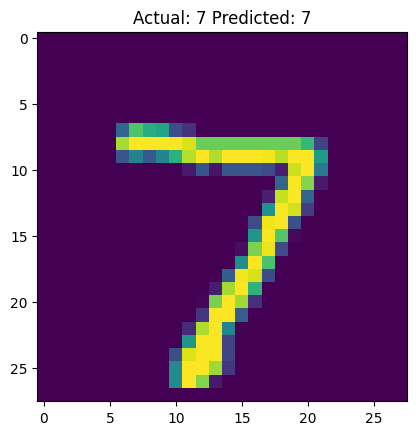

In [ ]:
# visualize one value to check result with actual and predicted
import matplotlib.pyplot as plt
plt.title('Actual: ' + str(y_test[0]) + ' Predicted: ' + str(Y_pred1[0]))
plt.imshow(x_test[0])